## <font color='purple'> DATA 240: Assignment 2

<font color='blue'><b>Name:</b> Eshita Gupta </br>
<b>Course:</b> Data 240

<font color='blue'> Import three libraries Numpy, Matplotlib and Pandas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### <font color='purple'> 1. Implanting K-means clustering algorithm 

<font color='purple'>  K-means algorithm is a method to automatically cluster similar data examples together. K-means is an iterative
procedure that starts by guessing the initial centroids, and then refines this guess by repeatedly assigning
examples to their closest centroids and then recomputing the centroids based on the assignments until they
converge. 

<font color='purple'>  Let’s assume K=3. 
Please implement K-means clustering algorithm from scratch. 
Put random seed as ‘123’.
Please plot the location of k centroids and their assignment for each cluster in 2D with different colors to
distinguish each cluster and its centroid for the first 5 steps (the initial setting of the centroids, Then, after
iteration 1/2/3/4). In your plot, set x-axis as ‘X1’ and y-axis as ‘X2’ as the below figure.

<font color='blue'> Read and load the first CSV file and converting data into Numpy Array

In [2]:
file = 'cluster_data1.csv'
cluster_data1 = pd.read_csv(file)

<font color='blue'> Print the head and check for any missing values

In [3]:
cluster_data1.head()

,X1,X2,X3,X4
0,6.7,3.0,5.0,1.7
1,6.3,2.9,5.6,1.8
2,5.6,3.0,4.5,1.5
3,7.6,3.0,6.6,2.1
4,6.0,3.4,4.5,1.6


In [4]:
cluster_data1.shape

(150, 4)

In [5]:
cluster_data1.isna().sum()

X1    0
X2    0
X3    0
X4    0
dtype: int64

In [6]:
cluster_data1.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
dtype: object

<font color='blue'> Checking if all the columns in cluster_data1 are standardized or not. </br>
<font color='blue'> Getting the means and standard deviation of all the columns of cluster_data1

In [7]:
means = cluster_data1.mean()
std_devs = cluster_data1.std()

print("Means of columns:\n", means)
print("Standard deviations of columns:\n", std_devs)

Means of columns:
 X1    5.843333
X2    3.054000
X3    3.758667
X4    1.198667
dtype: float64
Standard deviations of columns:
 X1    0.828066
X2    0.433594
X3    1.764420
X4    0.763161
dtype: float64


<font color='blue'> Checking Standardization-  By checking if the absolute values of the means are close to 0 and if the absolute values of the standard deviations are close to 1 within a specified tolerance (tol).

<font color='blue'> From above Means and SD we see, means are not closed to 0, however SD are almost close to 1. However, checking with a function call.

In [8]:
# Function to check if columns are standardized
def check_standardized(df, tol=1e-2):
    means = df.mean()
    std_devs = df.std()
    standardized = np.all(np.abs(means) < tol) and np.all(np.abs(std_devs - 1) < tol)
    return standardized

In [9]:
is_standardized = check_standardized(cluster_data1)

if is_standardized:
    print("The columns are already standardized.")
else:
    print("The columns are not standardized.")

The columns are not standardized.


<font color='blue'> Standardize all the columns in the data frame using z-score method.

<font color='blue'> The formula for calculating a <b>z-score is (z=(x-mu)/sigma))</b>. The standardized data will have a mean of 0 and a standard deviation of 1, while it retains the original data set's shape properties. 

In [10]:
cluster_data1_standardized = (cluster_data1 - cluster_data1.mean()) / cluster_data1.std()

display("Standardized data:\n", cluster_data1_standardized)

'Standardized data:\n'

,X1,X2,X3,X4
0,1.034539,-0.124540,0.703536,0.656917
1,0.551486,-0.355171,1.043591,0.787951
2,-0.293857,-0.124540,0.420157,0.394849
3,2.121409,-0.124540,1.610349,1.181053
4,0.189196,0.797981,0.420157,0.525883
...,...,...,...,...
145,-0.535384,1.951133,-1.393470,-1.046525
146,-0.656147,1.489872,-1.280118,-1.308593
147,0.309959,-1.047062,1.043591,0.263815
148,-0.173094,1.720502,-1.166767,-1.177559


<font color='blue'> Converting  data into Numpy Array

In [11]:
data_df = cluster_data1_standardized.to_numpy()

<font color='blue'> Visualising the data points considering x-axis as ‘X1’ and y-axis as ‘X2’

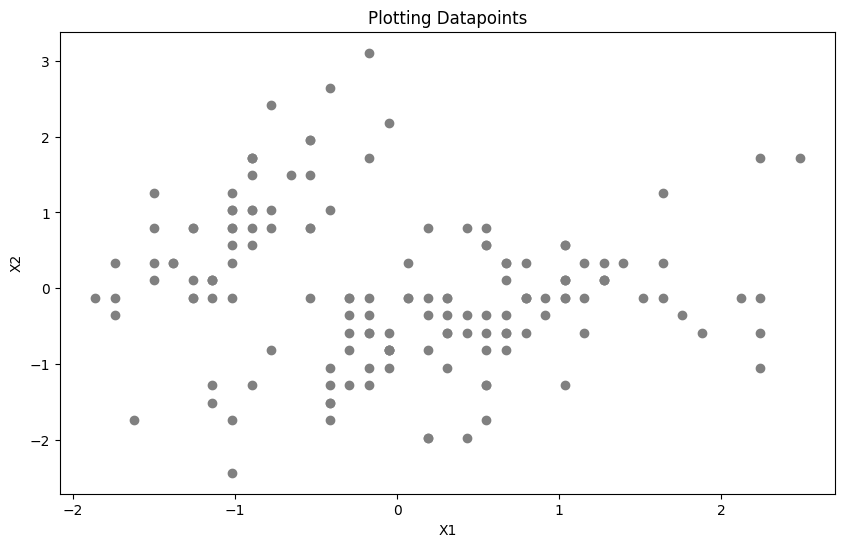

In [12]:
plt.figure(figsize=(10, 6))
plt.scatter(data_df[:, 0],data_df[:, 1],c='grey')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Plotting Datapoints')
plt.show()

<font color='blue'> Set the number of Clusters and setting the seed value to 123

<font color='blue'> <b>Step 1:</b> Choose the number of clusters k. Choosing the initial centroids randomly and putting seed to 123, so that we have same calls everytime we run the code.

In [13]:
K=3
random_seed = 123

<font color='blue'> <b> Step 2:</b> Select K random points from the data as our initial centroids

In [14]:
np.random.seed(random_seed)
initial_centroids_indices = np.random.choice(data_df.shape[0], K, replace=False)
initial_centroids = data_df[initial_centroids_indices]
print(f'Initial Centroids - {initial_centroids}')

Initial Centroids - [[-0.77691058  1.02861128 -1.28011819 -1.30859282]
 [-1.25996379  0.79798095 -1.05341485 -1.30859282]
 [ 1.63835547  1.25924161  1.32697021  1.70518904]]


<font color='blue'> Visualising the data points considering x-axis as ‘X1’ and y-axis as ‘X2’ along with the intial centroids

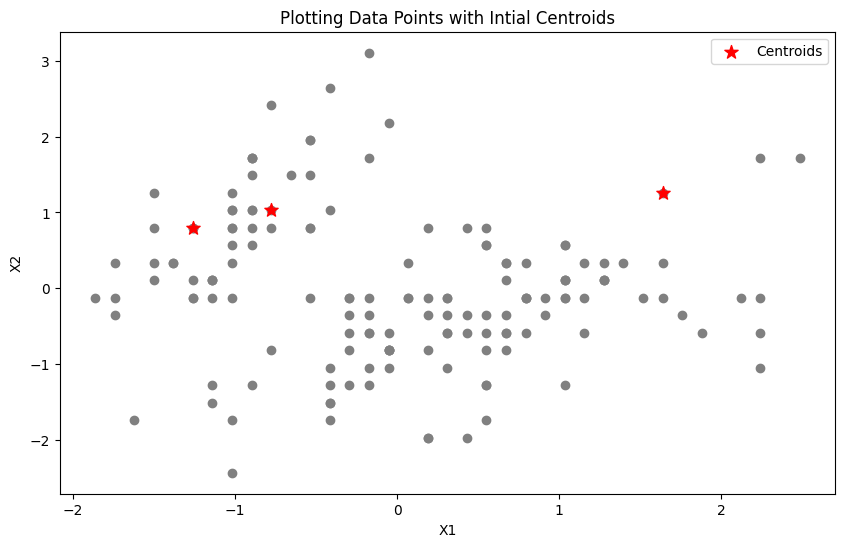

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(data_df[:, 0],data_df[:, 1],c='grey')
plt.scatter(initial_centroids[:, 0],initial_centroids[:, 1], c='red',label='Centroids',marker='*',s=100)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Plotting Data Points with Intial Centroids')
plt.legend()
plt.show()

<font color='blue'> <b> Step 3: </b> Calculate Euclidean distance for each data point from all the centroids. Based on the minimum distance, assign all the data points to the closest cluster centroid.

<font color='blue'> The distance between each data point to nearest centroid is calculated using Euclidean distance
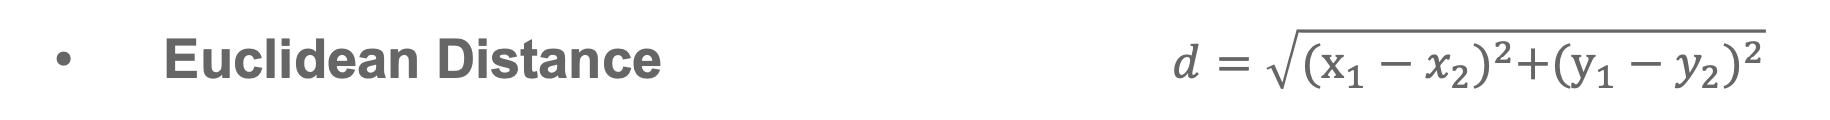

In [16]:
def cluster_assignments(data, centroids):
    clusters = np.zeros(len(data), dtype=int)
    for i, point in enumerate(data):
        distances = []
        for centroid in centroids:
            distance = np.sqrt(np.sum((point - centroid) ** 2))
            distances.append(distance)
        clusters[i] = np.argmin(distances)
    return clusters

<font color='blue'> Assign cluster labels based on initial centroids.

In [17]:
initial_cluster_labels = cluster_assignments(data_df, initial_centroids)

In [18]:
def cluster_scatter_plots(data, centroids, cluster_labels, iteration, mode='kpp'):
    plt.figure(figsize=(10, 6))
    colors = ['darkgoldenrod', 'mediumblue', 'seagreen']
    
    for i in range(len(np.unique(cluster_labels))):
        plotting_data = data[cluster_labels == i]
        plt.scatter(plotting_data[:, 0], plotting_data[:, 1], c=colors[i], label=f'Cluster {i}', alpha=0.7)
   
    for i in range(len(np.unique(cluster_labels))):
        plt.scatter(centroids[i, 0], centroids[i, 1], c=colors[i], marker='*', s=200, linewidths=3, label=f'Centroids {i}')
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    if mode == 'kpp':
        plt.title(f'K-means++ Clustering - Iteration {iteration}')
    else:
        plt.title(f'K-means Clustering - Iteration {iteration}')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

<font color='blue'> Plotting all datapoints with respective cluster labels formed by random initialization of centroids.

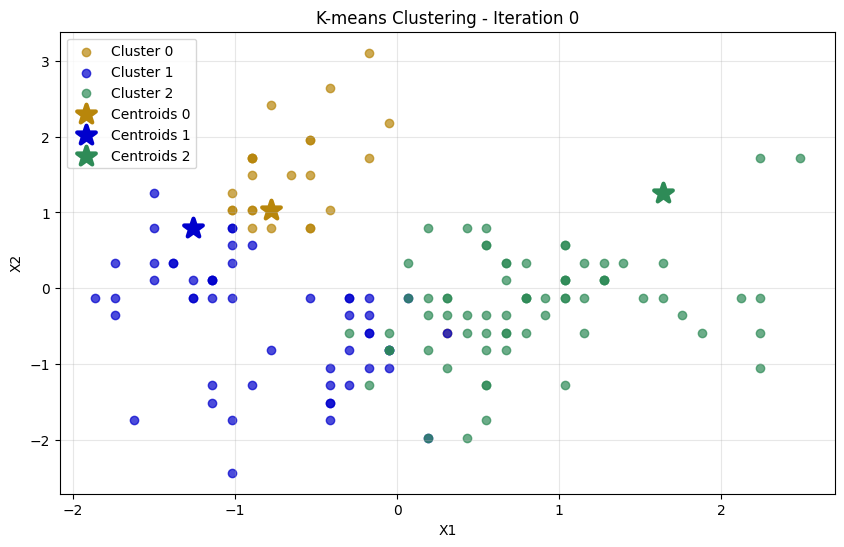

In [19]:
cluster_scatter_plots(data_df,initial_centroids,initial_cluster_labels,0,'km')

<font color='blue'> <b>Step 4:</b> Recompute the centroids of newly formed clusters by considering the mean for all datapoints within the same cluster.

In [20]:
def recalculate_new_centroids(data, cluster_labels, k):
    new_centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        cluster_points = data[cluster_labels == i]
        if len(cluster_points) > 0:
            new_centroids[i] = np.mean(cluster_points, axis=0)
    return new_centroids

#### Perform K-Means Clustering

<font color='blue'> <b>Step 5:</b> Repeating steps 3 and 4 for a max iteration of 4 as per the requirement. With every iteration, the centroids will be recalculated and the assignment of clusters will happen. The convergence will not happen with 4 iterations and it may take more iterations to converge. However, the requirement states to show only 5 steps considering the initial setting and 4 additional iterations, so restricting to a max of 4 iterations.

Old Centroids: 
 [[-0.77691058  1.02861128 -1.28011819 -1.30859282]
 [-1.25996379  0.79798095 -1.05341485 -1.30859282]
 [ 1.63835547  1.25924161  1.32697021  1.70518904]]
------------ Start K-Means Clustering ---------------

Iteration 1 centroids:
[[-0.63682515  1.42529545 -1.22797642 -1.15135203]
 [-0.83058316 -0.3936091  -0.56642249 -0.60489174]
 [ 0.85594534 -0.20249993  0.86318627  0.86546415]]


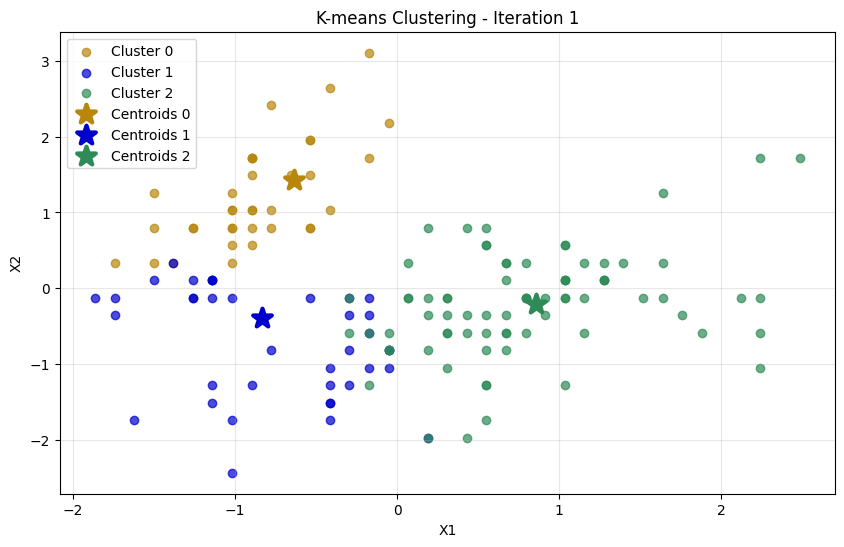


Iteration 2 centroids:
[[-0.87083759  1.22080322 -1.29428714 -1.21759699]
 [-0.78008856 -0.72539309 -0.4329636  -0.49135449]
 [ 0.8025463  -0.21557867  0.82956519  0.82243371]]


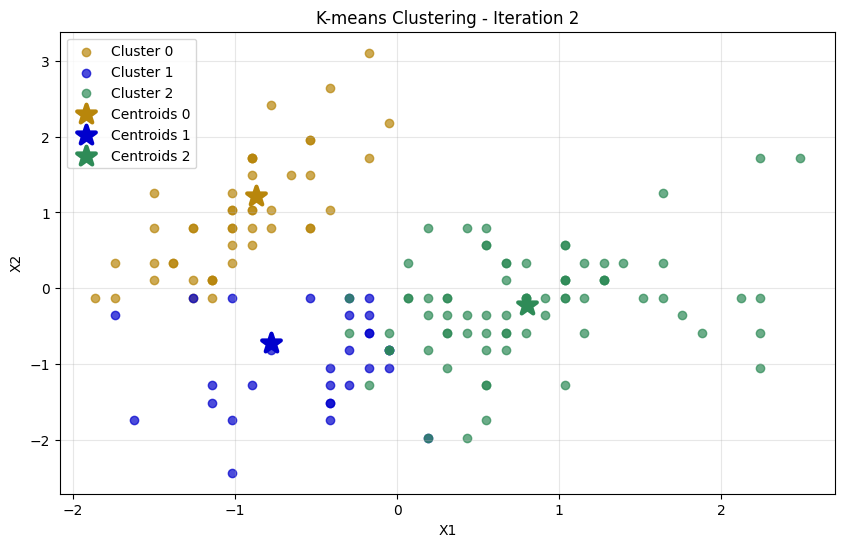


Iteration 3 centroids:
[[-0.97643255  0.96343314 -1.29859944 -1.25162152]
 [-0.56036948 -0.98343955 -0.09969735 -0.16543418]
 [ 0.81555483 -0.21064237  0.83502396  0.83162908]]


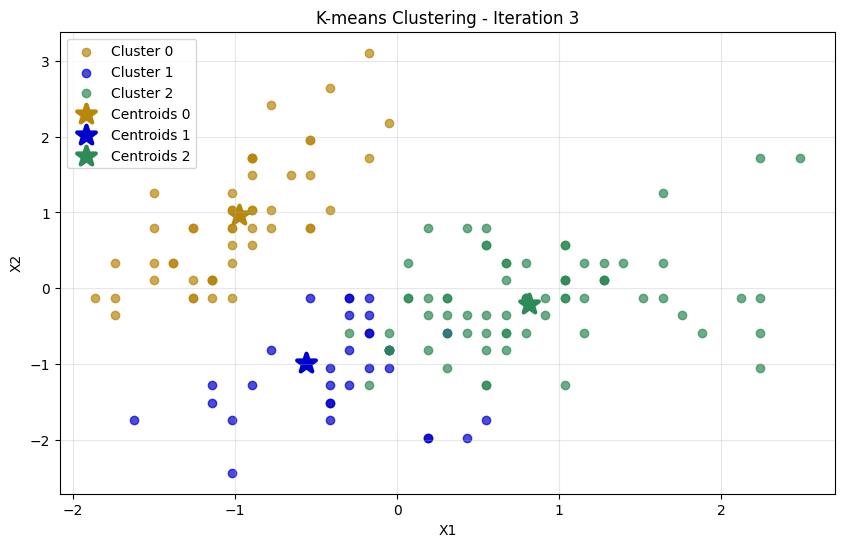


Iteration 4 centroids:
[[-0.99872072  0.89211578 -1.29862458 -1.25243539]
 [-0.35618681 -1.10657921  0.09838437  0.01442783]
 [ 0.85684438 -0.13442454  0.86546698  0.87031531]]


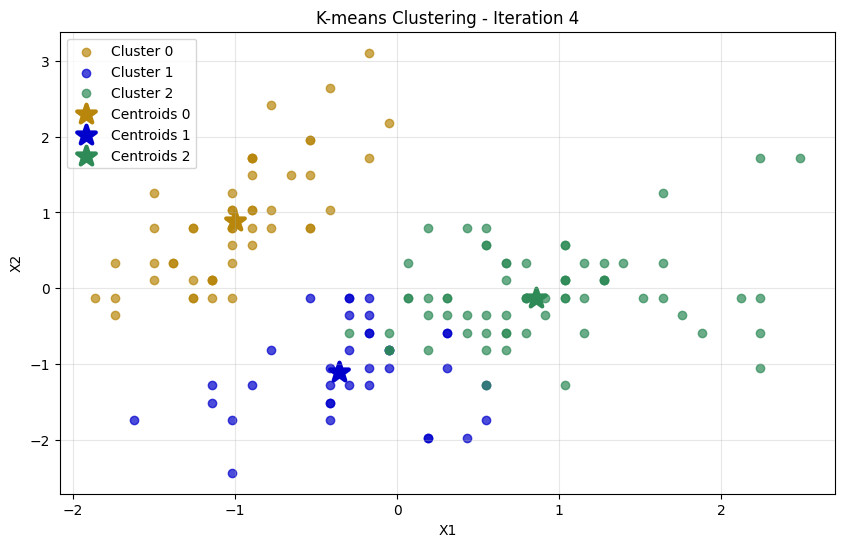

In [21]:
max_iters = 4
old_centroids = initial_centroids
new_cluster_labels = initial_cluster_labels
print(f'Old Centroids: \n {old_centroids}')
print("------------ Start K-Means Clustering ---------------")

for itr in range(max_iters):
    new_centroids = recalculate_new_centroids(data_df, new_cluster_labels, K)
    print(f"\nIteration {itr + 1} centroids:\n{new_centroids}")
    new_cluster_labels = cluster_assignments(data_df, new_centroids)
    cluster_scatter_plots(data_df, new_centroids, new_cluster_labels, itr+1,'km')

<font color='blue'> <b>Note:</b> Convergence means centroids of newly formed clusters will not change or rather data points remain in same cluster. However, our clustering algorithm does not converge at iteration 4, it needs more iterations. 

<font color='blue'> Also, we are viewing this data set that is in 4 dimensions in a 2 dimension view with axes X1 and X2. Therefore the cluster formation for K=3 would not be visible to us properly, as the clusters are forming in 4D space, and we are viewing it in (2D). 

### <font color='purple'>  2. Implanting K-means++ clustering algorithm and finding K 

<font color='purple'> The converged solution may not always be ideal and depends on the initial setting of the centroids.
To address this issue, K-means++ was introduced. You should implement K-means++ algorithm as described
during the class.


<font color='purple'> Please implement K-means++ algorithm from scratch. Put random seed as ‘123’.
Please plot the location of k centroids and their assignment for each cluster in 2D with different colors to
distinguish each cluster and its centroid for the first 5 steps (the initial setting of the centroids, Then, after
iteration 1/2/3/4). In your plot, set x-axis as ‘X1’ and y-axis as ‘X2’ as the above figure.

#### <font color='blue'> K-means++

<font color='blue'> The results from K-means clustering algorithm are significantly affected by the selection of centroids. As the initial centroids with K-means are randomly chosen, the results can vary significantly. To overcome this, K-means++ was introduced. The difference between K-means++ and K-means is primarily in the way in which the selection of initial centroids is done. After initial centroids are selected, the regular K-means clustering algorithm is used.

<font color='blue'> <b>Step 1:</b> First Centroid: The first centroid is chosen at random from the available data points. This is similar to the K-Means method, but instead of randomly picking all the centroids, we just pick one of the centroids.

In [22]:
np.random.seed(random_seed)
n_samples, n_features = data_df.shape
initial_centroids_kpp = np.zeros((1, n_features))
initial_centroids_kpp[0] = data_df[np.random.randint(0, n_samples)]

In [23]:
print(f'First Centroid - {initial_centroids_kpp}')

First Centroid - [[-0.29385737 -1.27769204  0.08010185 -0.12928687]]


<font color='blue'> Plotting the data points along with the first centroid

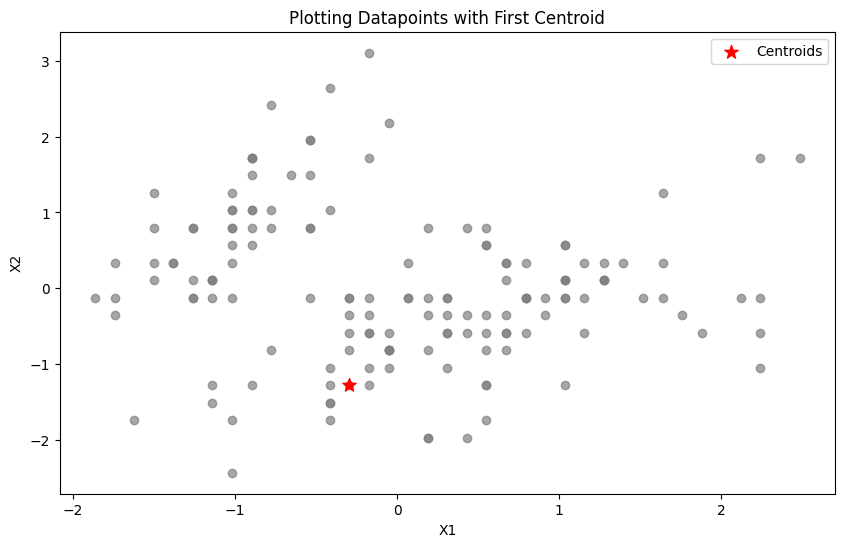

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(data_df[:, 0],data_df[:, 1],c='grey', alpha=0.7)
plt.scatter(initial_centroids_kpp[0, 0],initial_centroids_kpp[0, 1],c='red',label='Centroids',marker='*',s=100)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f'Plotting Datapoints with First Centroid')
plt.legend()
plt.show()

<font color='blue'> <b>Step 2:</b> Next, we compute the distance of each data point from the centroid. 

<font color='blue'> To choose the second centroid, distance is computed from each data point to the first centroid. Data point having the maximum distance from the first centroid is chosen as the second centroid.

In [25]:
distances = np.zeros(len(data_df))

for i, x in enumerate(data_df):
    min_distance = float('inf')
    for c in initial_centroids_kpp:
        distance = np.sqrt(np.sum((x - c) ** 2))
        if distance < min_distance:
            min_distance = distance
    distances[i] = min_distance

print(f'max_distance = {distances[np.argmax(distances)]}')
second_centroid = data_df[np.argmax(distances)]
initial_centroids_kpp = np.vstack([initial_centroids_kpp, second_centroid])

print(f'First and Second Centroid - \n {initial_centroids_kpp}')

max_distance = 4.680579467514699
First and Second Centroid - 
 [[-0.29385737 -1.27769204  0.08010185 -0.12928687]
 [-0.17309407  3.10428427 -1.28011819 -1.04652483]]


<font color='blue'> Plotting the data points along with the first & second centroids

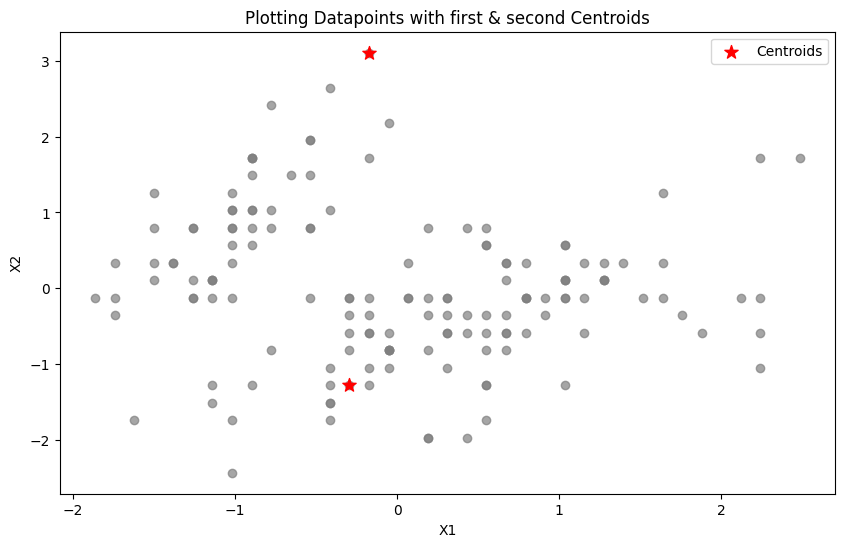

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(data_df[:, 0],data_df[:, 1],c='grey', alpha=0.7)
plt.scatter([initial_centroids_kpp[0, 0], initial_centroids_kpp[1, 0]], 
            [initial_centroids_kpp[0, 1], initial_centroids_kpp[1, 1]],c='red',label='Centroids',marker='*',s=100)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f'Plotting Datapoints with first & second Centroids')
plt.legend()
plt.show()

<font color='blue'> <b>Step 3.</b> Then, choose the next centroid from the data points with the longest distance from the previous
centroids.

<font color='blue'> Now, we have 2 centroids, and third centroid will be the one which has max distance from both of these previous centroids.

<font color='blue'> For this, first we calculate the distance of each data point to the previous centroids. We then find the minimum distance out of the calculated distances from previous centroids and store them in memory for each datapoint. Identifying the minimum distance for each datapoint establishes the closest centroid for each datapoint. We then use this data to identify the maximum distance value for a datapoint from its closest centroid. This helps us to identify the data point with the longest distance from both centroids.

<font color='blue'> This data point which is farthest from both the centroids becomes our next centroid. 

In [27]:
distances = np.zeros(len(data_df))

for i, x in enumerate(data_df):
    min_distance = float('inf')
    for c in initial_centroids_kpp:
        distance = np.sqrt(np.sum((x - c) ** 2))
        if distance < min_distance:
            min_distance = distance
    distances[i] = min_distance

print(f'max_distance = {distances[np.argmax(distances)]}')
third_centroid = data_df[np.argmax(distances)]
initial_centroids_kpp = np.vstack([initial_centroids_kpp, third_centroid])

print(f'All Centroids - \n {initial_centroids_kpp}')

max_distance = 4.483563607178986
All Centroids - 
 [[-0.29385737 -1.27769204  0.08010185 -0.12928687]
 [-0.17309407  3.10428427 -1.28011819 -1.04652483]
 [ 2.48369858  1.72050228  1.49699771  1.05001907]]


<font color='blue'> Plotting the data points along with all the identified centroids

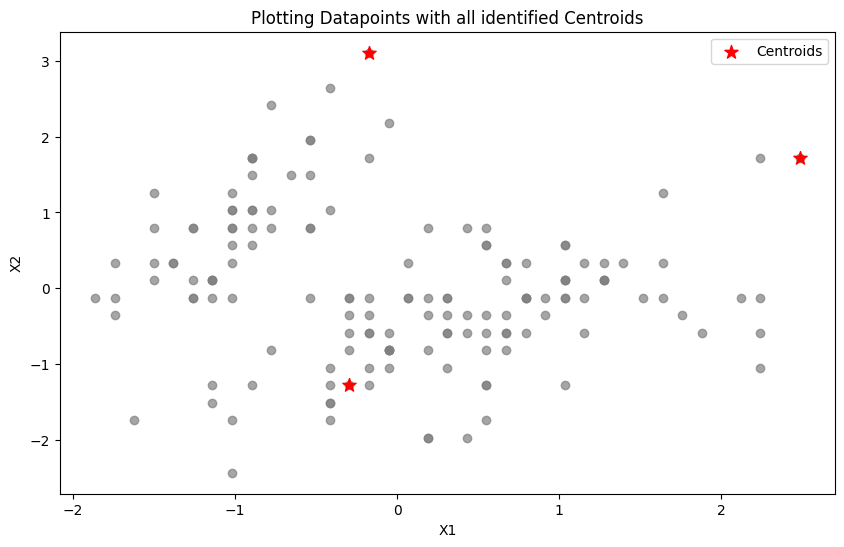

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(data_df[:, 0],data_df[:, 1],c='grey', alpha=0.7)
plt.scatter(initial_centroids_kpp[:, 0],initial_centroids_kpp[:, 1],c='red',label='Centroids',marker='*',s=100)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title(f'Plotting Datapoints with all identified Centroids')
plt.legend()
plt.show()

<font color='blue'> Assign cluster labels based on the identified centroids.

In [29]:
cluster_labels_kpp = cluster_assignments(data_df, initial_centroids_kpp)

<font color='blue'> Plotting all datapoints with respective cluster labels formed by using K-means++ method for identifying centroids

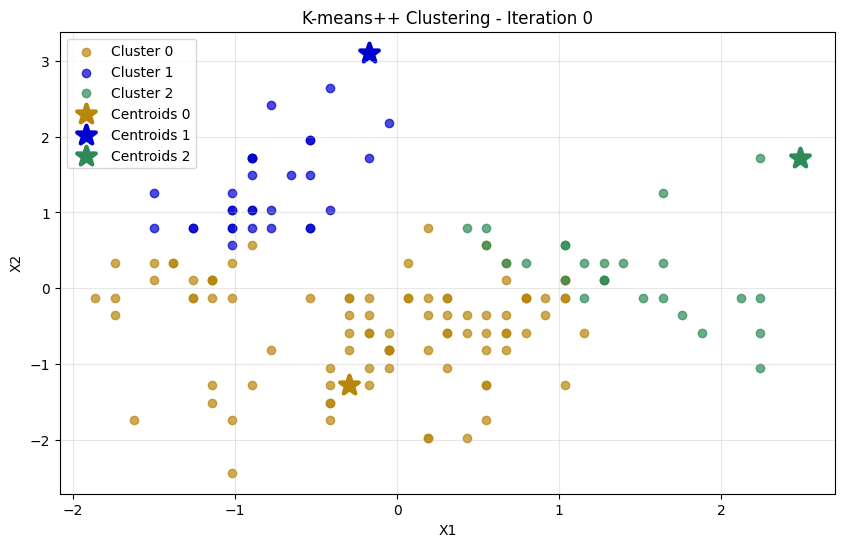

In [30]:
cluster_scatter_plots(data_df,initial_centroids_kpp,cluster_labels_kpp,0,'kpp')

#### Perform K-Means++ Clustering

<font color='blue'> We will now perform the Kmeans clustering to recalculate centroids and assign the labels for a max iteration of 4 as per the requirement. With every iteration, the centroids will be recalculated and the assignment of clusters will happen. The convergence will not happen with 4 iterations and it may take more iterations to converge. However, the requirement states to show only 5 steps considering the initial setting and 4 additional iterations, so restricting to a max of 4 iterations.

Old Centroids: 
 [[-0.77691058  1.02861128 -1.28011819 -1.30859282]
 [-1.25996379  0.79798095 -1.05341485 -1.30859282]
 [ 1.63835547  1.25924161  1.32697021  1.70518904]]
------------ Start K-Means++ Clustering ---------------

Iteration 1 centroids:
[[-0.13413816 -0.52876343  0.0959467   0.06092376]
 [-0.80028412  1.35595756 -1.28560294 -1.21560095]
 [ 1.4339868   0.2746275   1.1896403   1.23145076]]


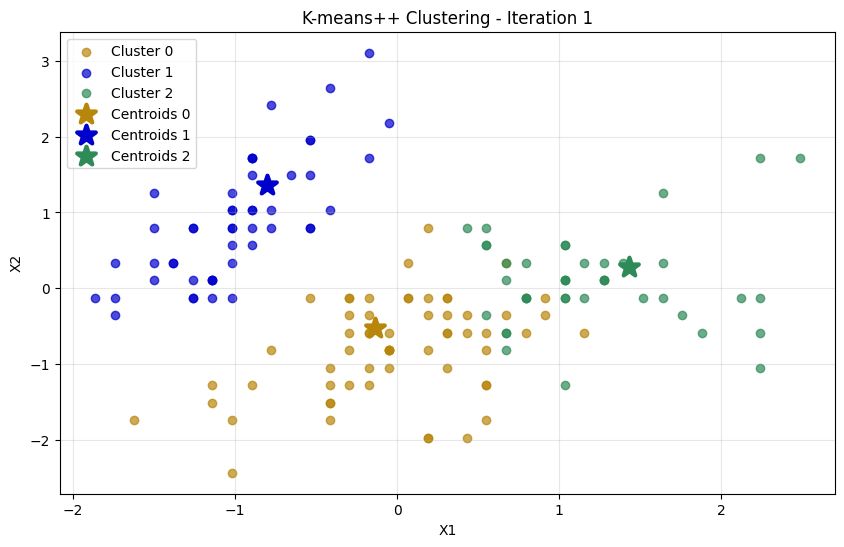


Iteration 2 centroids:
[[-0.01610177 -0.79336834  0.33325391  0.27910241]
 [-0.99872072  0.89211578 -1.29862458 -1.25243539]
 [ 1.21715663  0.09483969  1.0643261   1.08837048]]


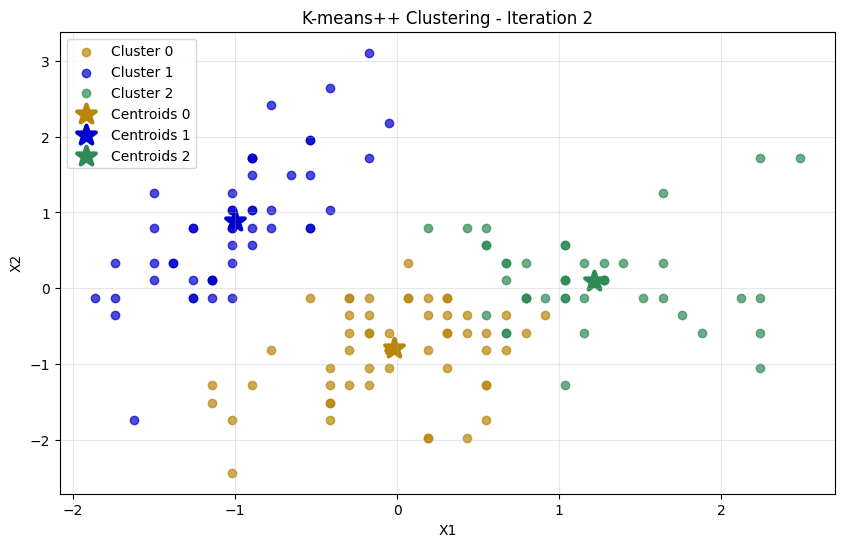


Iteration 3 centroids:
[[-0.0286094  -0.84114177  0.36550516  0.31061296]
 [-1.01119138  0.83949441 -1.30052149 -1.25093786]
 [ 1.18549308  0.11657315  1.01267694  1.02619471]]


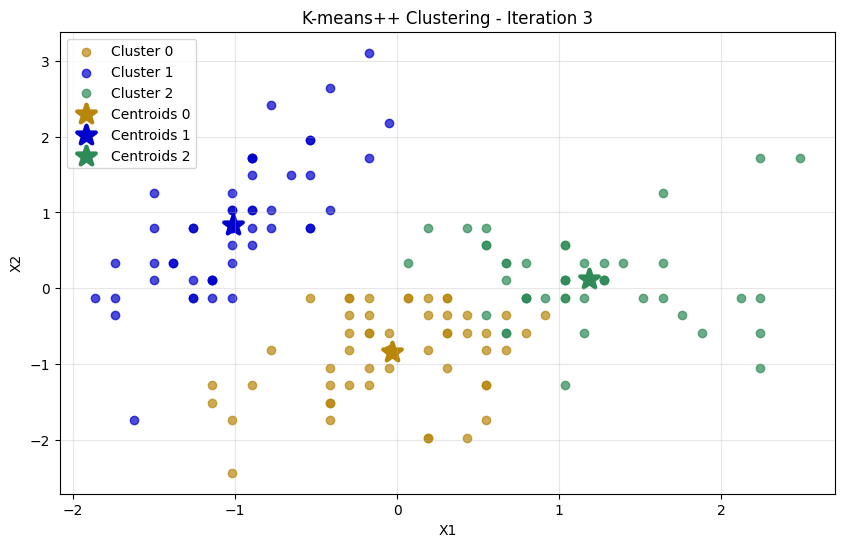


Iteration 4 centroids:
[[-0.0303738  -0.86255744  0.36142008  0.30193409]
 [-1.01119138  0.83949441 -1.30052149 -1.25093786]
 [ 1.16066951  0.12146531  1.00328822  1.02090041]]


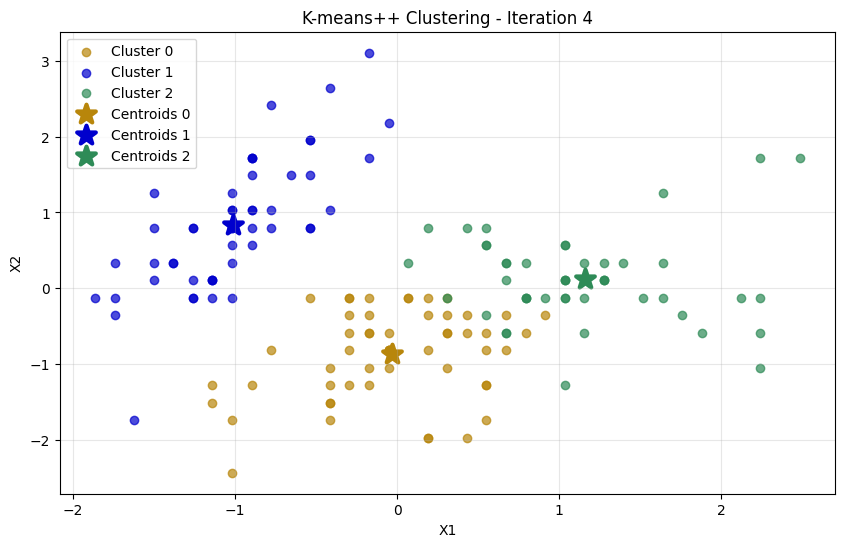

In [31]:
max_iters = 4
old_centroids_kpp = initial_centroids_kpp
new_cluster_labels_kpp = cluster_labels_kpp
print(f'Old Centroids: \n {old_centroids}')
print("------------ Start K-Means++ Clustering ---------------")

for itr in range(max_iters):
    new_centroids_kpp = recalculate_new_centroids(data_df, new_cluster_labels_kpp, K)
    print(f"\nIteration {itr + 1} centroids:\n{new_centroids_kpp}")
    new_cluster_labels_kpp = cluster_assignments(data_df, new_centroids_kpp)
    cluster_scatter_plots(data_df, new_centroids_kpp, new_cluster_labels_kpp, itr+1,'kpp')

<font color='blue'> We see with K-Means++, even in the initial iteration i.e. 1 cluster formation was better as compared with the K-Means algorithm, where all centroids were selected randomly. Also, with K-means at iteration 4, we were not able to get a clear distinction or formation of clusters. However, with K-Means++ at iteration 4, we were able to get results as compared to cluster formation. With this, we can safely say that K-means++ would converge faster as compared to K-means. The selection of initial centroids plays an important role in the overall performance of the K-Means algorithm.

<font color='blue'> <b>Note:</b> Our clustering algorithm does not converge at iteration 4, it needs more iterations. However, as per requirement we are restricting to 4.

<font color='blue'>Also, we are viewing this data set that is in 4 dimensions in a 2 dimension view with axes X1 and X2. Therefore the cluster formation for K=3 would not be visible to us properly, as the clusters are forming in 4D space, and we are viewing it in (2D).

### <font color='purple'> 3. Implanting KNN classification

<font color='purple'>Please implement KNN classification algorithm from scratch.
Please assign class for each data point based on the result of problem #2 using K-NN method.

<font color='blue'> Read and load the first CSV file and converting data into Numpy Array

In [32]:
cluster_data2 = pd.read_csv('cluster_data2.csv')

<font color='blue'> Print the head and check for any missing values

In [33]:
cluster_data2.head()

,X1,X2,X3,X4
0,5.21,3.65,1.42,0.25
1,5.07,3.41,1.43,0.19
2,5.85,2.65,4.14,1.27
3,5.64,2.73,4.03,1.23
4,6.55,2.90,5.54,2.05


In [34]:
cluster_data2.shape

(15, 4)

In [35]:
cluster_data2.isna().sum()

X1    0
X2    0
X3    0
X4    0
dtype: int64

In [36]:
cluster_data2.dtypes

X1    float64
X2    float64
X3    float64
X4    float64
dtype: object

In [37]:
#Getting the means and standard deviation of all the columns of cluster_data1
means = cluster_data2.mean()
std_devs = cluster_data2.std()

print("Means of columns:\n", means)
print("Standard deviations of columns:\n", std_devs)

Means of columns:
 X1    5.843333
X2    3.054000
X3    3.758667
X4    1.198667
dtype: float64
Standard deviations of columns:
 X1    0.691165
X2    0.295074
X3    1.771032
X4    0.761923
dtype: float64


<font color='blue'> From above Means and SD we see, means are not close to 0, however SD are almost close to 1. However, checking with a function call.

<font color='blue'>  Checking if all the columns in cluster_data2 are standardized or not.
Getting the means and standard deviation of all the columns of cluster_data2

In [38]:
is_standardized = check_standardized(cluster_data2)

if is_standardized:
    print("The columns are already standardized.")
else:
    print("The columns are not standardized.")

The columns are not standardized.


<font color='blue'> Standardize all the columns in the data frame using z-score method.

In [39]:
cluster_data2_standardized = (cluster_data2 - cluster_data2.mean()) / cluster_data2.std()

display("Standardized data:\n", cluster_data2_standardized)

'Standardized data:\n'

,X1,X2,X3,X4
0,-0.916327,2.019833,-1.320510,-1.245095
1,-1.118883,1.206478,-1.314864,-1.323843
2,0.009646,-1.369149,0.215317,0.093623
3,-0.294189,-1.098030,0.153206,0.041124
4,1.022428,-0.521903,1.005816,1.117348
5,-0.019291,-1.030251,0.288721,0.185496
6,-1.422718,0.867579,-1.303571,-1.284469
7,1.138174,-0.318564,0.983231,0.959852
8,-1.205693,1.138698,-1.247107,-1.218846
9,0.877745,-0.081336,0.887242,1.274844


<font color='blue'> Converting data into Numpy Array

In [40]:
data_df2 = cluster_data2_standardized.to_numpy()

<font color='blue'> <b> Prepare Training and Test Data

X_old = X_train </br>
original_labels = y_train </br>
X_new = X_test

In [41]:
# Prepare training data (X_train, y_train)
X_old = data_df
original_labels = new_cluster_labels_kpp
original_centroid = new_centroids_kpp
print(f'Original centroids - {original_centroid}') # Clusters were assigned based on this centroid for Question 2

# Prepare test data (X_test)
X_new = data_df2

Original centroids - [[-0.0303738  -0.86255744  0.36142008  0.30193409]
 [-1.01119138  0.83949441 -1.30052149 -1.25093786]
 [ 1.16066951  0.12146531  1.00328822  1.02090041]]


<font color='blue'> <b> Step-1: </b> Select the number K of the neighbors

In [42]:
K=3

<font color='blue'> Function to set the X_train, y_train and K values for our KNN model

In [43]:
def fit(X_train, y_train, k=3):
    return {'X_train': X_train, 'y_train': y_train, 'k': k}

<font color='blue'> <b> Step-2: </b> Calculate the Euclidean distance of K number of neighbors

In [44]:
def calculate_euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2, axis=1))

<font color='blue'> <b> Step-3: </b> Take the K nearest neighbors as per the calculated Euclidean distance.

In [45]:
def get_k_nearest_neighbors(distances, k):
    k_indices = np.argsort(distances)[:k]
    return k_indices

<font color='blue'> <b> Step-4:</b> Among these k neighbors, count the number of the data points in each category.

In [46]:
def count_labels(k_nearest_labels):
    return np.bincount(k_nearest_labels)

<font color='blue'> <b> Step-5:</b> Assign the new data points to that category for which the number of the neighbor is maximum.

In [47]:
def find_most_common_label(label_counts):
    return label_counts.argmax()

In [48]:
def determine_most_common_label(k_nearest_labels):
    label_counts = count_labels(k_nearest_labels)
    most_common_label = find_most_common_label(label_counts)
    return most_common_label

<font color='blue'> Function for calculating the Predicted cluster assignments on the test dataset using the values from K-means++ results

In [49]:
def predict(model, X_test):
    X_train = model['X_train']
    y_train = model['y_train']
    k = model['k']
    predictions = []
    
    for x in X_test:
        distances = calculate_euclidean_distance(X_train, x)
        k_indices = get_k_nearest_neighbors(distances, k)
        k_nearest_labels = y_train[k_indices]
        most_common = determine_most_common_label(k_nearest_labels)
        predictions.append(most_common)
        
    return np.array(predictions)

<font color='blue'> Initialize the KNN Classifier and perform predictions on the test dataset.

new_labels = y_test

In [50]:
KNNClassifier = fit(X_old, original_labels, K)

# new_labels = y_test
new_labels = predict(KNNClassifier, X_new)
print(f'The labels for Test datset (cluster_data2.csv) are: {new_labels}')

The labels for Test datset (cluster_data2.csv) are: [1 1 0 0 2 0 1 2 1 2 0 2 1 2 0]


<font color = 'blue'> Assigned labels to the Test Dataset

0 = Cluster 0 </br>
1 = Cluster 1 </br>
2 = Cluster 2 

In [51]:
cluster_data2['Label'] = new_labels
display(cluster_data2)

,X1,X2,X3,X4,Label
0,5.21,3.65,1.42,0.25,1
1,5.07,3.41,1.43,0.19,1
2,5.85,2.65,4.14,1.27,0
3,5.64,2.73,4.03,1.23,0
4,6.55,2.90,5.54,2.05,2
5,5.83,2.75,4.27,1.34,0
6,4.86,3.31,1.45,0.22,1
7,6.63,2.96,5.50,1.93,2
8,5.01,3.39,1.55,0.27,1
9,6.45,3.03,5.33,2.17,2


<font color='blue'> Plot the assigned clusters for the test dataset using the centroids from Kmeans++ which gave labels for Question 2

In [52]:
def plot_classification_results(X_test, y_test, centroids, plot_original='N'):
    plt.figure(figsize=(10, 6))
    colors = ['darkgoldenrod', 'mediumblue', 'seagreen']
    
    for i in range(len(np.unique(original_labels))):
        plt.scatter(centroids[i, 0], centroids[i, 1], c=colors[i], marker='*', s=200, linewidths=3, label=f'Centroids {i}')
    
    for i in range(len(np.unique(y_test))):
        plotting_data = X_test[y_test == i]
        plt.scatter(plotting_data[:, 0], plotting_data[:, 1], c=colors[i], marker='v', label=f'Cluster {i}', alpha=0.9)
    
    if plot_original == 'Y':
        for i in range(len(np.unique(original_labels))):
            plotting_data = X_old[original_labels == i]
            plt.scatter(plotting_data[:, 0], plotting_data[:, 1], c=colors[i], marker='o', label=f'Original Cluster {i}', alpha=0.1)
        
    plt.title('KNN Classification Results on Test dataset')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

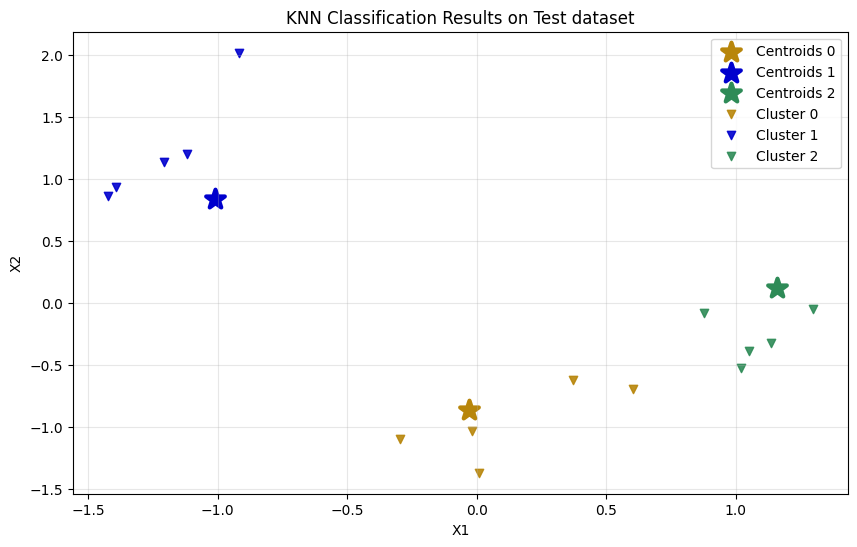

In [53]:
plot_classification_results(X_new, new_labels, original_centroid,'N')

<font color='blue'> Plot the assigned clusters for the test dataset using the centroids from Kmeans++ along with original datapoints from cluster_data1 for quick visual representation of assigned clusters.

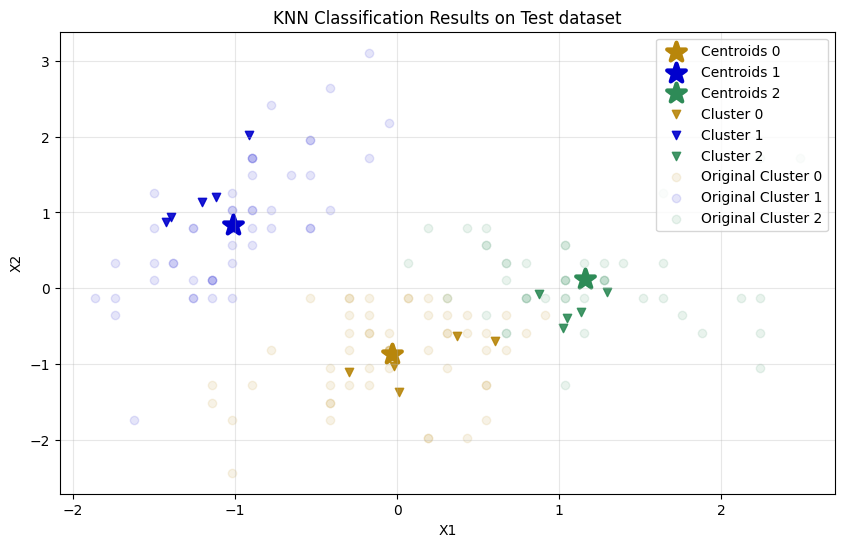

In [54]:
plot_classification_results(X_new, new_labels, original_centroid,'Y')

### Thank You!!